# YouTube Video Performance Analysis: A Manchester United Focus

## Introduction

Hello, my name is Maxwell Adigwe, and I am a data analyst, business analyst, and e-commerce expert. In this project, we explore the analysis of YouTube video data, specifically focusing on content related to Manchester United. The data used for this analysis was sourced from the YouTube API and web scraping techniques, with a focus on YouTube channels that have garnered over a million views.

The primary goal of this project is to uncover valuable insights into YouTube video performance. We will examine how various factors—such as video descriptions, likes, comments, views, and video duration—contribute to a video's overall success. By analyzing the data, we aim to understand what works well for channels with high engagement, particularly those discussing Manchester United, a popular subject among football fans.

This project builds upon my experience as a data analyst. Recently, I performed a similar analysis for a client involved in content creation. The objective was to provide actionable insights on improving video engagement, optimizing content for higher viewership, and ultimately increasing the reach and impact of their YouTube channel. This project is just one of many I have worked on in the fields of content creation, e-commerce, and business analysis.

## Objectives

- **Identify Key Factors Contributing to Video Success**: By analyzing variables such as the number of likes, comments, and video duration, this project aims to determine how these factors influence video views and overall performance.

- **Examine Video Descriptions and Tags**: Investigating the relationship between video descriptions and their performance will provide insights into the types of keywords or themes that attract more views and interactions.

- **Determine Optimal Video Duration**: One of the goals is to explore whether there is an ideal video length that maximizes views and engagement based on the data collected.

- **Provide Actionable Insights for Content Creators**: The ultimate aim is to offer actionable recommendations for content creators to improve audience engagement and increase views, particularly for those in the sports niche or other similar verticals.

This project demonstrates the power of data analytics in understanding online content performance. The insights provided aim to inspire content creators and businesses to optimize their strategies using data-driven approaches.

I invite you to explore the following sections of the notebook, where we break down the data analysis process step by step and showcase the insights gathered throughout the project.


## Import all the needed Libaries

In [154]:
!pip install google-api-python-client
!pip install isodate
pip install wordcloud
import numpy as np
from googleapiclient.discovery import build
import pandas as pd
from IPython.display import JSON
from datetime import datetime
import isodate 

## I will use my API key from Google
## Console to fetch data from YouTube channels 
## featuring Manchester United content, 
## focusing on videos with over 1 million views

In [4]:
api_key = 'jCz0s_Ie2GmK8Yql_3tkAIAHsRjLkTAz0c'

In [46]:
def main():
    # Replace with your actual API key
    api_key = 'jCz0s_Ie2GmK8Yql_3tkAIAHsRjLkTAz0c'
    api_service_name = "youtube"
    api_version = "v3"
    
    # Define the list of channel IDs
    channel_ids = [
        "UCSoH-gNtz_ENvl8xJCic6QA",  
        "UCcdtVik2ltz_jzqERfufgFw",  
        "UCpryVRk_VDudG8SHXgWcG0w",  
        "UCtxY7t6au19lRff2zZjyZnA",
        "UCn6Tr78HWt7xhImtuUTFHhA",  
        "UCCmo_NIuQR5eU4AvBa6sEQQ",  
        "UCkzCjdRMrW2vXLx8mvPVLdQ",  
        "UCCNOsmurvpEit9paBOzWtUg",
        "UCU2PacFf99vhb3hNiYDmxww",
        "UC9LQwHZoucFT94I2h6JOcjw",
    
    ]

    try:
        # Build the YouTube API client
        youtube = build(api_service_name, 
                        api_version, developerKey=api_key)

        # Request statistics for the specified channels
        request = youtube.channels().list(
            part="snippet,statistics,contentDetails",  
            id=','.join(channel_ids)  
        )
        response = request.execute()

        # Prepare to collect all data
        all_data = []

        # Process and print channel statistics
        for channel in response.get('items', []):
            channel_name = channel['snippet']['title']
            subscribers = channel['statistics'].get('subscriberCount', 'Hidden')
            total_views = channel['statistics']['viewCount']
            video_count = channel['statistics']['videoCount']
            playlist_id = channel['contentDetails']['relatedPlaylists']['uploads']

            # Append data to the list
            all_data.append({
                'channelName': channel_name,
                'subscribers': subscribers,
                'views': total_views,
                'totalVideos': video_count,
                'playlistId': playlist_id
            })

        # Create a Pandas DataFrame
        youtube_df = pd.DataFrame(all_data)

        # Display the DataFrame
        print(youtube_df)

        # Optionally save to a CSV file
        youtube_df.to_csv("channel_manu_statistics.csv", index=False)
        print("\nData saved to 'channel_manu_statistics.csv'.")

    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()


                    channelName subscribers       views totalVideos  \
0          Adobe Women's FA Cup        1710       45738           9   
1                      Man City     7890000  2184560835        8816   
2            West Ham United FC      691000   208628249        3114   
3  Manchester United Foundation      113000    12130876         589   
4                    Special1HD      171000    42229516          44   
5         Chelsea Football Club     5590000  1449213073        6451   
6                       Arsenal     4380000  1356587080        4019   
7                       EliteTv        8310     2249850           3   
8                  Liverpool FC    10700000  3115968946        7460   
9                           EFL      540000   142821443        3635   

                 playlistId  
0  UUn6Tr78HWt7xhImtuUTFHhA  
1  UUkzCjdRMrW2vXLx8mvPVLdQ  
2  UUCNOsmurvpEit9paBOzWtUg  
3  UUSoH-gNtz_ENvl8xJCic6QA  
4  UUtxY7t6au19lRff2zZjyZnA  
5  UUU2PacFf99vhb3hNiYDmxww  
6  UUpry

In [47]:
# Save the channel as a CSV file
df = pd.read_csv(r"C:\Users\USER\channel_manu_statistics.csv")
df

,channelName,subscribers,views,totalVideos,playlistId
0,Adobe Women's FA Cup,1710,45738,9,UUn6Tr78HWt7xhImtuUTFHhA
1,Man City,7890000,2184560835,8816,UUkzCjdRMrW2vXLx8mvPVLdQ
2,West Ham United FC,691000,208628249,3114,UUCNOsmurvpEit9paBOzWtUg
3,Manchester United Foundation,113000,12130876,589,UUSoH-gNtz_ENvl8xJCic6QA
4,Special1HD,171000,42229516,44,UUtxY7t6au19lRff2zZjyZnA
5,Chelsea Football Club,5590000,1449213073,6451,UUU2PacFf99vhb3hNiYDmxww
6,Arsenal,4380000,1356587080,4019,UUpryVRk_VDudG8SHXgWcG0w
7,EliteTv,8310,2249850,3,UUcdtVik2ltz_jzqERfufgFw
8,Liverpool FC,10700000,3115968946,7460,UU9LQwHZoucFT94I2h6JOcjw
9,EFL,540000,142821443,3635,UUCmo_NIuQR5eU4AvBa6sEQQ


## Lets Get the Videos from each Channel 

In [58]:
# Get video statistics and details from each channel
def get_video_statistics(youtube, video_id):
    
    request = youtube.videos().list(
        part="snippet,statistics,contentDetails",
        id=video_id
    )
    response = request.execute()
    
    if 'items' in response and len(response['items']) > 0:
        video_data = response['items'][0]

   # Extract relevant and useful data     
        snippet = video_data['snippet']
        statistics = video_data['statistics']
        content_details = video_data['contentDetails']

        video_id = video_data['id']
        channel_title = snippet['channelTitle']
        title = snippet['title']
        description = snippet.get('description', 'No Description')
        tags = snippet.get('tags', [])
        published_at = snippet['publishedAt']
        view_count = statistics.get('viewCount', 0)
        like_count = statistics.get('likeCount', 0)
        favorite_count = statistics.get('favoriteCount', 0)
        comment_count = statistics.get('commentCount', 0)
        duration = content_details['duration']
        definition = content_details['definition']
        caption = content_details['caption']

# Calculate additional metrics such as date and time
        publish_day_name = datetime.strptime(published_at,
                                             "%Y-%m-%dT%H:%M:%SZ").strftime("%A")
        duration_secs = isodate.parse_duration(duration).total_seconds()
        tags_count = len(tags)
        title_length = len(title)
        
 # Calculate ratios fot likes and comments      
        like_ratio = (int(like_count) / int(view_count)) if int(view_count) > 0 else 0
        comment_ratio = (int(comment_count) / int(view_count)) if int(view_count) > 0 else 0

        return {
            'video_id': video_id,
            'channelTitle': channel_title,
            'title': title,
            'description': description,
            'tags': tags,
            'publishedAt': published_at,
            'viewCount': view_count,
            'likeCount': like_count,
            'favoriteCount': favorite_count,
            'commentCount': comment_count,
            'duration': duration,
            'definition': definition,
            'caption': caption,
            'publishDayName': publish_day_name,
            'durationSecs': duration_secs,
            'tagsCount': tags_count,
            'likeRatio': like_ratio,
            'commentRatio': comment_ratio,
            'titleLength': title_length
        }
    
    return None

def main():
    api_key = 'jCz0s_Ie2GmK8Yql_3tkAIAHsRjLkTAz0c'
    api_service_name = "youtube"
    api_version = "v3"
    
# Define the list of channel IDs for the video analysis
    channel_ids = [
         "UCSoH-gNtz_ENvl8xJCic6QA",  
        "UCcdtVik2ltz_jzqERfufgFw",  
        "UCpryVRk_VDudG8SHXgWcG0w",  
        "UCtxY7t6au19lRff2zZjyZnA",
        "UCn6Tr78HWt7xhImtuUTFHhA",  
        "UCCmo_NIuQR5eU4AvBa6sEQQ",  
        "UCkzCjdRMrW2vXLx8mvPVLdQ",  
        "UCCNOsmurvpEit9paBOzWtUg",
        "UCU2PacFf99vhb3hNiYDmxww",
        "UC9LQwHZoucFT94I2h6JOcjw",]

    try:
# Build the YouTube API client
        youtube = build(api_service_name, api_version, developerKey=api_key)

# Prepare to collect all data
        all_data = []

# Request statistics for the specified channels and Pass the list of channel IDs
        request = youtube.channels().list(
            part="snippet,contentDetails",
            id=','.join(channel_ids)  
        )
        response = request.execute()

# Process each channel
        for channel in response.get('items', []):
            playlist_id = channel['contentDetails']['relatedPlaylists']['uploads']
            
            
#Get the video IDs from the playlist
            playlist_request = youtube.playlistItems().list(
                part="snippet",
                playlistId=playlist_id,
                maxResults=50  # Limit to first 50 videos (adjust as needed)
            )
            playlist_response = playlist_request.execute()

            # Get statistics for each video in the playlist
            for video in playlist_response.get('items', []):
                video_id = video['snippet']['resourceId']['videoId']
                video_stats = get_video_statistics(youtube, video_id)
                if video_stats:
                    all_data.append(video_stats)

# Create a Pandas DataFrame and save to a CSV file
        youtube_df = pd.DataFrame(all_data)

        
        youtube_df.to_csv("video_statistics.csv", index=False)
        

    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()


In [60]:
# Save the videos as a CSV file
df_video = pd.read_csv(r"C:\Users\USER\video_statistics.csv")
df_video.head(20)

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption,publishDayName,durationSecs,tagsCount,likeRatio,commentRatio,titleLength
0,I7sF-lA41dg,Special1HD,LIVERPOOL VS ARSENAL | AN EPIC 8 GOAL THRILLER...,LIVERPOOL VS ARSENAL | AN EPIC 8 GOAL THRILLER...,[],2024-10-09T15:53:33Z,22505,277,0,20,PT8M14S,hd,False,Wednesday,494.0,0,0.012308,0.000889,66
1,qVpxP8XDul4,Special1HD,MAN CITY VS MAN UNITED | A GAME OF EPIC COMEBA...,MAN CITY VS MAN UNITED | A GAME OF EPIC COMEBA...,"['MAN CITY VS MAN UNITED 2018', 'manchester ci...",2024-10-06T12:31:27Z,24266,250,0,8,PT12M56S,hd,False,Sunday,776.0,3,0.010302,0.000330,58
2,v79MEJGQKCk,Special1HD,Manchester United Road to PL VICTORY 2006/7 !!,Manchester United Road to PL VICTORY 2006/7 !!...,"['Manchester United', 'Man United', 'Mancheste...",2024-09-07T16:11:33Z,479995,5889,0,212,PT32M28S,hd,False,Saturday,1948.0,12,0.012269,0.000442,46
3,yGF52wQKIZk,Special1HD,Spain Road to WORLD CUP 2010 Victory !!,SPAIN Road to WORLD CUP 2010 Victory !!\n\n🔔 T...,"['spain', 'spain world cup 2010', 'spain world...",2024-08-24T15:04:56Z,13096,247,0,9,PT9M20S,hd,False,Saturday,560.0,8,0.018861,0.000687,39
4,1rpF1jDm0zo,Special1HD,Spain Road to EURO 2024 Victory !!,SPAIN road to EURO 2024 VICTORY !!\n\n🔔 Turn n...,[],2024-08-01T19:29:34Z,1107113,13211,0,520,PT14M58S,hd,False,Thursday,898.0,0,0.011933,0.000470,34
5,1zP4TmUAVgo,Special1HD,Italy Road to EURO 2020 Victory !!,Italy Road to EURO 2020 Victory !!\n\n🔔 Turn n...,[],2024-06-30T05:07:04Z,47227,575,0,10,PT14M24S,hd,False,Sunday,864.0,0,0.012175,0.000212,34
6,TW-88ORzFJs,Special1HD,Portugal vs Wales | Euro 2016 Semi-finals 2016 |,Portugal vs Wales | Euro 2016 Semi-finals 2016...,[],2024-06-17T12:57:47Z,9902,120,0,8,PT8M45S,hd,False,Monday,525.0,0,0.012119,0.000808,48
7,tVHrkRerhiI,Special1HD,Bayern Munich vs Dortmund: Extended Highlights...,Bayern Munich vs Dortmund: Extended Highlights...,"['bayern munich', 'dortmund vs bayern ucl fina...",2024-06-05T13:33:51Z,73196,1132,0,26,PT10M58S,hd,False,Wednesday,658.0,6,0.015465,0.000355,65
8,Bj_1GpQtsgI,Special1HD,Arsenal vs Manchester United: Extended Highlig...,The Day Cristiano Ronaldo Destroyed Arsenal |...,[],2024-04-14T11:34:23Z,1267772,15615,0,522,PT10M19S,hd,False,Sunday,619.0,0,0.012317,0.000412,77
9,sIIu22tJuxs,Special1HD,"Barcelona Road to UCL Victory 2014/15 | Messi,...",Barcelona Road to UCL Victory 2014/15 | Messi ...,[],2024-04-09T09:05:56Z,2231787,31592,0,650,PT19M50S,hd,False,Tuesday,1190.0,0,0.014155,0.000291,64


## Preprocessing & Feature Engineering

## Merge the two Tables and perform Data Cleaning

In [69]:
manu = pd.merge(df_video, df, left_on='channelTitle',
                right_on='channelName', how='inner')
manu.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,...,durationSecs,tagsCount,likeRatio,commentRatio,titleLength,channelName,subscribers,views,totalVideos,playlistId
0,I7sF-lA41dg,Special1HD,LIVERPOOL VS ARSENAL | AN EPIC 8 GOAL THRILLER...,LIVERPOOL VS ARSENAL | AN EPIC 8 GOAL THRILLER...,[],2024-10-09T15:53:33Z,22505,277,0,20,...,494.0,0,0.012308,0.000889,66,Special1HD,171000,42229516,44,UUtxY7t6au19lRff2zZjyZnA
1,qVpxP8XDul4,Special1HD,MAN CITY VS MAN UNITED | A GAME OF EPIC COMEBA...,MAN CITY VS MAN UNITED | A GAME OF EPIC COMEBA...,"['MAN CITY VS MAN UNITED 2018', 'manchester ci...",2024-10-06T12:31:27Z,24266,250,0,8,...,776.0,3,0.010302,0.000330,58,Special1HD,171000,42229516,44,UUtxY7t6au19lRff2zZjyZnA
2,v79MEJGQKCk,Special1HD,Manchester United Road to PL VICTORY 2006/7 !!,Manchester United Road to PL VICTORY 2006/7 !!...,"['Manchester United', 'Man United', 'Mancheste...",2024-09-07T16:11:33Z,479995,5889,0,212,...,1948.0,12,0.012269,0.000442,46,Special1HD,171000,42229516,44,UUtxY7t6au19lRff2zZjyZnA
3,yGF52wQKIZk,Special1HD,Spain Road to WORLD CUP 2010 Victory !!,SPAIN Road to WORLD CUP 2010 Victory !!\n\n🔔 T...,"['spain', 'spain world cup 2010', 'spain world...",2024-08-24T15:04:56Z,13096,247,0,9,...,560.0,8,0.018861,0.000687,39,Special1HD,171000,42229516,44,UUtxY7t6au19lRff2zZjyZnA
4,1rpF1jDm0zo,Special1HD,Spain Road to EURO 2024 Victory !!,SPAIN road to EURO 2024 VICTORY !!\n\n🔔 Turn n...,[],2024-08-01T19:29:34Z,1107113,13211,0,520,...,898.0,0,0.011933,0.000470,34,Special1HD,171000,42229516,44,UUtxY7t6au19lRff2zZjyZnA


In [62]:
# check for missing values
manu.isna().sum()

video_id           0
channelTitle       0
title              0
description       32
tags               0
publishedAt        0
viewCount          0
likeCount          0
favoriteCount      0
commentCount       0
duration           0
definition         0
caption            0
publishDayName     0
durationSecs       0
tagsCount          0
likeRatio          0
commentRatio       0
titleLength        0
channelName        0
subscribers        0
views              0
totalVideos        0
playlistId         0
dtype: int64

In [183]:
# Replace all missing values in the 'description' column with no description
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

manu['description'].fillna('No Description', inplace=True)

In [64]:
#check the data types
manu.dtypes

video_id           object
channelTitle       object
title              object
description        object
tags               object
publishedAt        object
viewCount           int64
likeCount           int64
favoriteCount       int64
commentCount        int64
duration           object
definition         object
caption              bool
publishDayName     object
durationSecs      float64
tagsCount           int64
likeRatio         float64
commentRatio      float64
titleLength         int64
channelName        object
subscribers         int64
views               int64
totalVideos         int64
playlistId         object
dtype: object

In [73]:
# Convert publisheedAt from object to datetime
manu['publishedAt'] = pd.to_datetime(manu['publishedAt'],
                                     format="%Y-%m-%dT%H:%M:%SZ")
# Create new columns from the publishedAt column
manu['year'] = manu['publishedAt'].dt.year
manu['month'] = manu['publishedAt'].dt.month
manu['day'] = manu['publishedAt'].dt.day


In [74]:
# Convert durationSecs to numeric
manu['durationSecs'] = pd.to_numeric(manu['durationSecs'],
                                     errors='coerce')


In [77]:
# View the columns
manu.columns

Index(['video_id', 'channelTitle', 'title', 'description', 'tags',
       'publishedAt', 'viewCount', 'likeCount', 'favoriteCount',
       'commentCount', 'duration', 'definition', 'caption', 'publishDayName',
       'durationSecs', 'tagsCount', 'likeRatio', 'commentRatio', 'titleLength',
       'channelName', 'subscribers', 'views', 'totalVideos', 'playlistId',
       'year', 'month', 'day'],
      dtype='object')

In [84]:
# Drop unnecessary columns 
drop = ['favoriteCount', 'publishDayName', 'likeRatio', 'commentRatio', 
                   'title', 'channelTitle', 'duration', 'playlistId']
new = manu.drop(columns=drop)
new.head(3)

,video_id,description,tags,publishedAt,viewCount,likeCount,commentCount,definition,caption,durationSecs,tagsCount,titleLength,channelName,subscribers,views,totalVideos,year,month,day
0,I7sF-lA41dg,LIVERPOOL VS ARSENAL | AN EPIC 8 GOAL THRILLER...,[],2024-10-09 15:53:33,22505,277,20,hd,False,494.0,0,66,Special1HD,171000,42229516,44,2024,10,9
1,qVpxP8XDul4,MAN CITY VS MAN UNITED | A GAME OF EPIC COMEBA...,"['MAN CITY VS MAN UNITED 2018', 'manchester ci...",2024-10-06 12:31:27,24266,250,8,hd,False,776.0,3,58,Special1HD,171000,42229516,44,2024,10,6
2,v79MEJGQKCk,Manchester United Road to PL VICTORY 2006/7 !!...,"['Manchester United', 'Man United', 'Mancheste...",2024-09-07 16:11:33,479995,5889,212,hd,False,1948.0,12,46,Special1HD,171000,42229516,44,2024,9,7


In [105]:
# Remove spaces, use lower cases and rename the columns
new.columns = new.columns.str.lower().str.replace(' ', '_').str.replace('count', '_count').str.replace('secs', '_secs')

In [115]:
new.head(2)

,video_id,description,view_count,like_count,comment_count,definition,caption,duration_secs,tags_count,titlelength,channelname,subscribers,views,totalvideos,year,month,day
0,I7sF-lA41dg,LIVERPOOL VS ARSENAL | AN EPIC 8 GOAL THRILLER...,22505,277,20,hd,False,494.0,0,66,Special1HD,171000,42229516,44,2024,October,Tuesday
1,qVpxP8XDul4,MAN CITY VS MAN UNITED | A GAME OF EPIC COMEBA...,24266,250,8,hd,False,776.0,3,58,Special1HD,171000,42229516,44,2024,October,Saturday


### Exploratory Data Analysis

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

##  What is the Total views across all videos

#### ANS = Total views across all videos: 100483209

In [121]:
total_views = new['view_count'].sum()
print(f"Total views across all videos: {total_views}")

Total views across all videos: 100483209


## Distribution of video titles' length

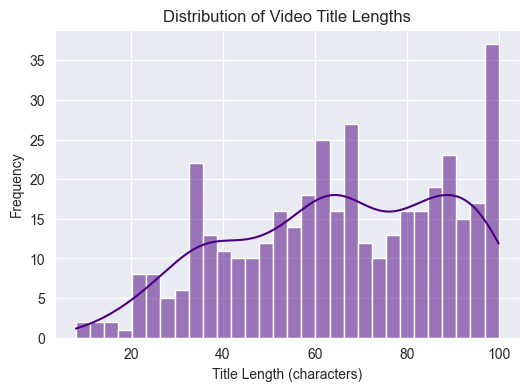

In [184]:
#. Distribution of video titles' length
fig, ax = plt.subplots(figsize=(6, 4))
sns.set_style("darkgrid")
sns.histplot(new['titlelength'], kde=True, bins=30, 
             color='indigo', ax=ax)
ax.set_title("Distribution of Video Title Lengths")
ax.set_xlabel("Title Length (characters)")
ax.set_ylabel("Frequency")
plt.show()

## Whats the relationship between view_count and like_count

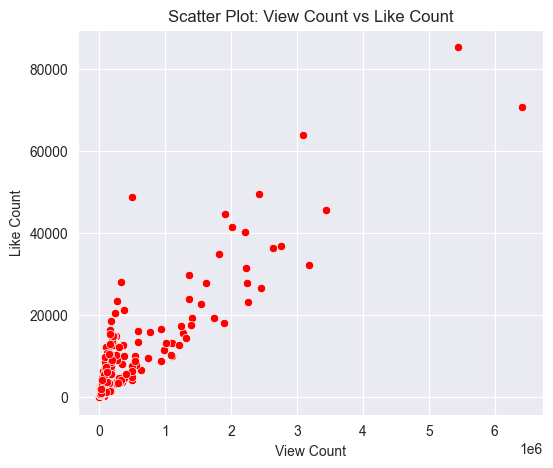

In [185]:
# . Relationship between view_count and like_count (Scatter plot)
fig, ax = plt.subplots(figsize=(6, 5))
sns.set_style("darkgrid")
sns.scatterplot(data=new, x='view_count', y='like_count', 
                color='red', ax=ax)
ax.set_title("Scatter Plot: View Count vs Like Count")
ax.set_xlabel("View Count")
ax.set_ylabel("Like Count")
plt.show()

## Whats Channel has the most views?

Answer = SpecialHD

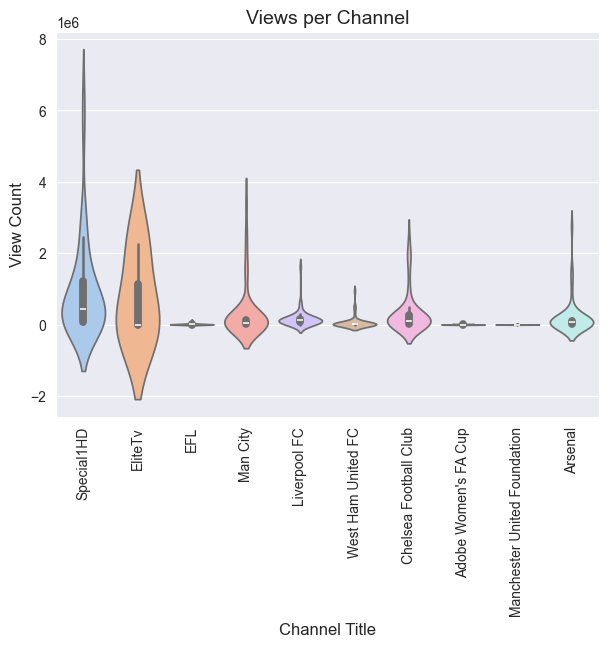

In [186]:
plt.rcParams['figure.figsize'] = (7, 5)

# Create the violin plot
sns.violinplot(x='channelname', y='view_count', 
               data=new, palette='pastel')
sns.set_style("darkgrid")
# Customize the title and labels
plt.title('Views per Channel', fontsize=14)
plt.xlabel('Channel Title', fontsize=12)
plt.ylabel('View Count', fontsize=12)
plt.xticks(rotation=90)
plt.show()

## Whats the  correlation between views, likes, and comments

### Answer = The correlation table reveals a strong positive
relationship between view_count and like_count (0.897),

as well as between view_count and comment_count (0.824),

indicating that higher likes and comments are associated with more views

In [137]:
# Calculate correlation between views, likes, and comments
correlation_matrix = new[['view_count', 'like_count',
                          'comment_count']].corr()
correlation_matrix

,view_count,like_count,comment_count
view_count,1.000000,0.897477,0.823803
like_count,0.897477,1.000000,0.801727
comment_count,0.823803,0.801727,1.000000


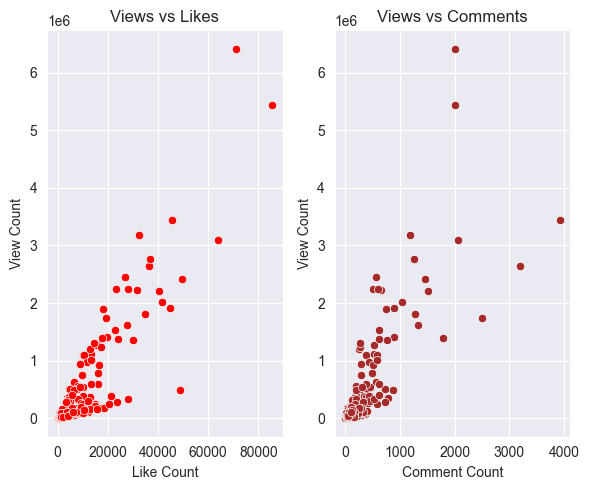

In [152]:
fig, axes = plt.subplots(1, 2, figsize=(6, 5))
sns.set_style("darkgrid")
# Plot views vs likes
sns.scatterplot(data=new, x='like_count', y='view_count', ax=axes[0], color='red')
axes[0].set_title('Views vs Likes')
axes[0].set_xlabel('Like Count')
axes[0].set_ylabel('View Count')
# Plot views vs comments
sns.scatterplot(data=new, x='comment_count', y='view_count', ax=axes[1], color='brown')
axes[1].set_title('Views vs Comments')
axes[1].set_xlabel('Comment Count')
axes[1].set_ylabel('View Count')
plt.tight_layout()
plt.show()


In [144]:
import statsmodels.api as sm
# Prepare data for regression
X = new[['like_count', 'comment_count']] 
X = sm.add_constant(X)  
y = new['view_count']  

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary()

                            OLS Regression Results                            
Dep. Variable:             view_count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     1026.
Date:                Wed, 18 Dec 2024   Prob (F-statistic):          6.98e-159
Time:                        18:05:23   Log-Likelihood:                -5649.0
No. Observations:                 406   AIC:                         1.130e+04
Df Residuals:                     403   BIC:                         1.132e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.554e+04   1.49e+04     -3.731

In [187]:
# Data for the table
data = {
    "Variable": ["const", "like_count", "comment_count"],
    "Coefficient": [-55540.0, 43.12, 486.18],
    "Std. Error": [14900.0, 2.19, 56.24],
    "t-statistic": [-3.731, 19.65, 8.65],
    "P-value": [0.000, 0.000, 0.000],
    "[0.025": [-84800.0, 38.81, 375.63],
    "0.975]": [-26300.0, 47.43, 596.74]}
# Create the DataFrame
Correlation = pd.DataFrame(data)
Correlation

,Variable,Coefficient,Std. Error,t-statistic,P-value,[0.025,0.975]
0,const,-55540.00,14900.00,-3.731,0.0,-84800.00,-26300.00
1,like_count,43.12,2.19,19.650,0.0,38.81,47.43
2,comment_count,486.18,56.24,8.650,0.0,375.63,596.74


#### The regression results indicate that both like_count and 

##### comment_count significantly and positively influence view_count,

##### with like_count having a smaller but highly significant impact

##### and comment_count having a larger effect on increasing views

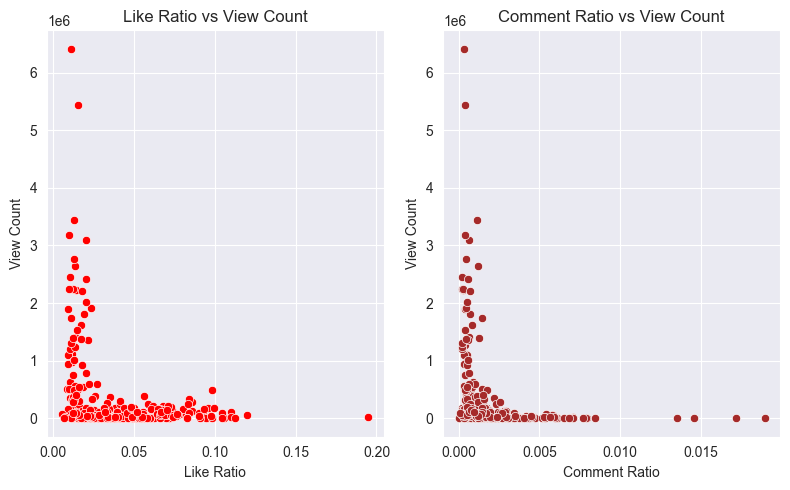

In [151]:
# Use the like snd comment ratio to answer the above question
# Create Like-to-View and Comment-to-View Ratios
new['like_ratio'] = new['like_count'] / new['view_count']
new['comment_ratio'] = new['comment_count'] / new['view_count']
# Now, let's plot the ratios vs view count side by side
sns.set_style("darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
sns.scatterplot(data=new, x='like_ratio', y='view_count', 
                ax=axes[0], color='red')
axes[0].set_title('Like Ratio vs View Count')
axes[0].set_xlabel('Like Ratio')
axes[0].set_ylabel('View Count')

sns.scatterplot(data=new, x='comment_ratio', y='view_count',
                ax=axes[1], color='brown')
axes[1].set_title('Comment Ratio vs View Count')
axes[1].set_xlabel('Comment Ratio')
axes[1].set_ylabel('View Count')
plt.tight_layout()
plt.show()

## Does the video's duration affect views
#### Ans = Yes, shorter videos tend to have higher engagement and views

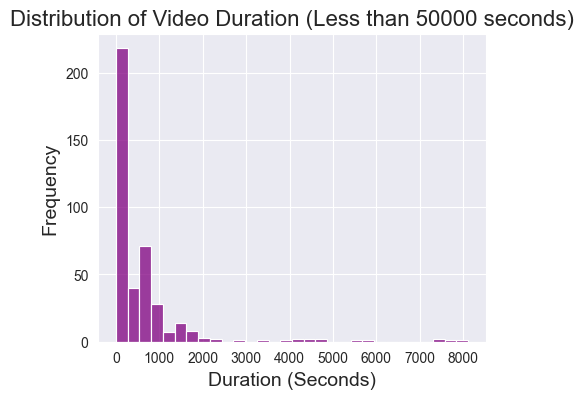

In [189]:
# Lets see the relationship between commments and views

fig, ax = plt.subplots(figsize=(5, 4))
sns.histplot(data=new[new['duration_secs'] < 50000], 
             x="duration_secs", bins=30, color='purple', ax=ax)
ax.set_title('Distribution of Video Duration (Less than 50000 seconds)',
             fontsize=16)
ax.set_xlabel('Duration (Seconds)', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
plt.show()

### How does video duration affect views, likes, and comments?
#### Ans = The correlations suggest that video duration has a very weak

positive relationship with views (0.041) and very weak negative

relationships with likes (-0.035) and comments (-0.021)
#### Recommendation
Based on the weak correlations between video duration and views, likes, and comments, 

it's recommended that content creators focus on creating engaging content rather

than emphasizing video length, as duration does not strongly influence interactions

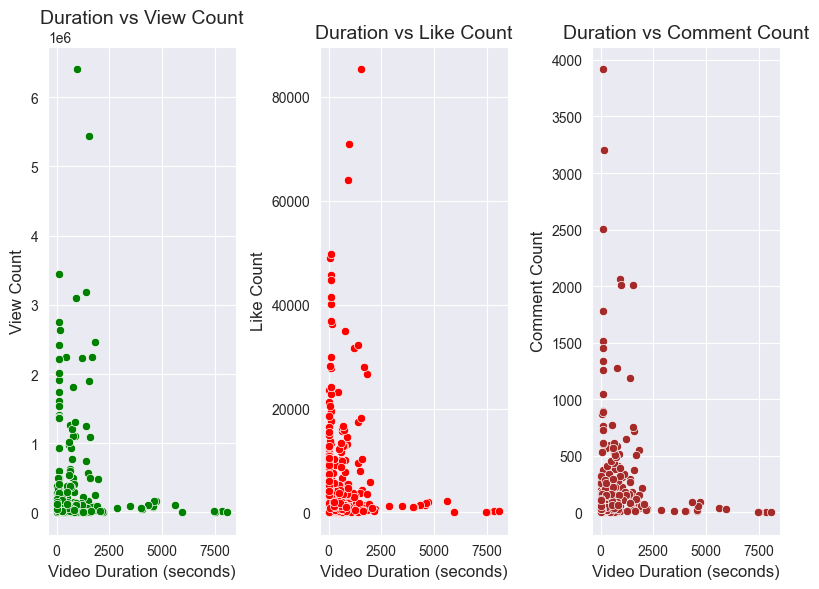

In [157]:
# Plotting Duration vs Views
fig, axes = plt.subplots(1, 3, figsize=(8, 6))
sns.set_style("darkgrid")
# Duration vs View Count
sns.scatterplot(data=new, x='duration_secs',
                y='view_count', ax=axes[0], color='green')
axes[0].set_title('Duration vs View Count', fontsize=14)
axes[0].set_xlabel('Video Duration (seconds)', fontsize=12)
axes[0].set_ylabel('View Count', fontsize=12)

# Duration vs Like Count
sns.scatterplot(data=new, x='duration_secs',
                y='like_count', ax=axes[1], color='red')
axes[1].set_title('Duration vs Like Count', fontsize=14)
axes[1].set_xlabel('Video Duration (seconds)', fontsize=12)
axes[1].set_ylabel('Like Count', fontsize=12)

# Duration vs Comment Count
sns.scatterplot(data=new, x='duration_secs', 
                y='comment_count', ax=axes[2], color='brown')
axes[2].set_title('Duration vs Comment Count', fontsize=14)
axes[2].set_xlabel('Video Duration (seconds)', fontsize=12)
axes[2].set_ylabel('Comment Count', fontsize=12)
plt.tight_layout()
plt.show()

In [158]:
# Correlation analysis
correlation_views_duration = new[['duration_secs', 'view_count']].corr().iloc[0, 1]
correlation_likes_duration = new[['duration_secs', 'like_count']].corr().iloc[0, 1]
correlation_comments_duration = new[['duration_secs', 'comment_count']].corr().iloc[0, 1]

print(f"Correlation between Duration and Views: {correlation_views_duration:.3f}")
print(f"Correlation between Duration and Likes: {correlation_likes_duration:.3f}")
print(f"Correlation between Duration and Comments: {correlation_comments_duration:.3f}")

Correlation between Duration and Views: 0.041
Correlation between Duration and Likes: -0.035
Correlation between Duration and Comments: -0.021


### What are the most common words used in the video descriptions?

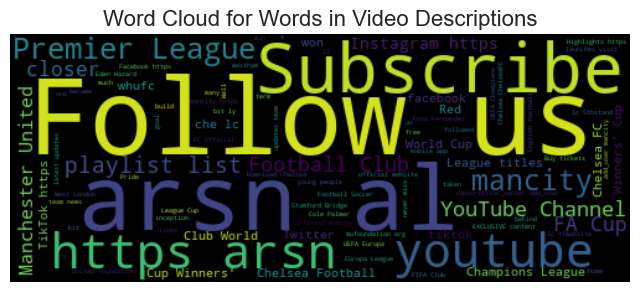

In [173]:
from wordcloud import WordCloud
# Combine all descriptions into a single text
text = ' '.join(new['description'].dropna())
# Create the word cloud
wordcloud = WordCloud(width=500, height=200, background_color='black').generate(text)
# Plot the word cloud
plt.figure(figsize=(8, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Don't show axis
plt.title('Word Cloud for Words in Video Descriptions', fontsize=16)
plt.show()

### What are the most common words used in the video channel name?

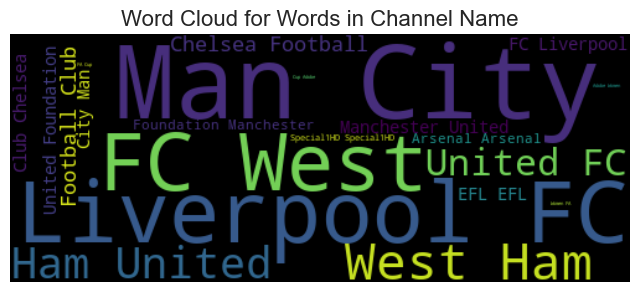

In [182]:
# Combine all descriptions into a single text
text = ' '.join(new['channelname'].dropna())
# Create the word cloud
wordcloud = WordCloud(width=500, height=200, background_color='black').generate(text)
# Plot the word cloud
plt.figure(figsize=(8, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Don't show axis
plt.title('Word Cloud for Words in Channel Name', fontsize=16)
plt.show()

### Which day(s) of the week and Month(s) of the year are most videos uploaded?
#### ANSWER 1 = Tuesday and Saturday
#### Answer 2 = November-December

In [178]:
# Convert 'month' column to categorical type to preserve order of month
day_order = ['Monday', 'Tuesday', 'Wednesday',
             'Thursday', 'Friday', 'Saturday', 'Sunday']
new['day'] = pd.Categorical(new['day'], categories=day_order, ordered=True)

# Convert 'month' column to categorical type to preserve order of month
month_order = ['January', 'Febuary', 'March', 'April', 'May', 'June',
               'July','August','September','Ocrober',
               'November', 'December']
new['month'] = pd.Categorical(new['month'], 
                              categories=month_order, ordered=True)

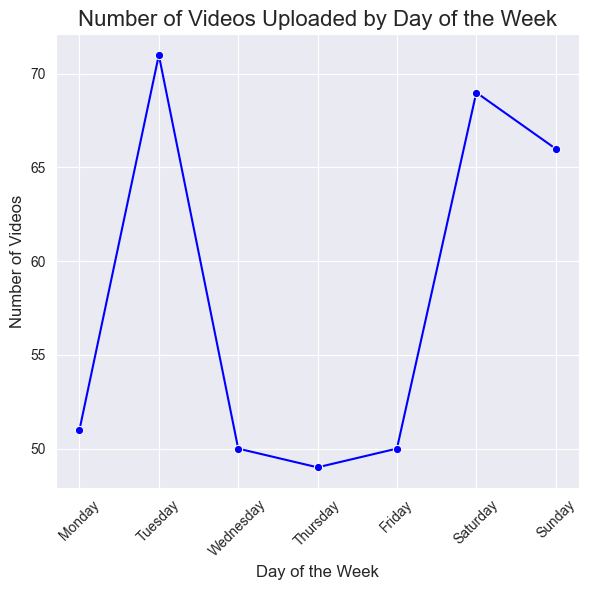

In [179]:
# Count the number of videos uploaded on each day
video_counts_per_day = new['day'].value_counts().sort_index()
# Plotting the data
fig, ax = plt.subplots(figsize=(6, 6))
sns.set_style("darkgrid")
sns.lineplot(x=video_counts_per_day.index,
             y=video_counts_per_day.values, marker='o',
             ax=ax, color='blue')
ax.set_title('Number of Videos Uploaded by Day of the Week', fontsize=16)
ax.set_xlabel('Day of the Week', fontsize=12)
ax.set_ylabel('Number of Videos', fontsize=12)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

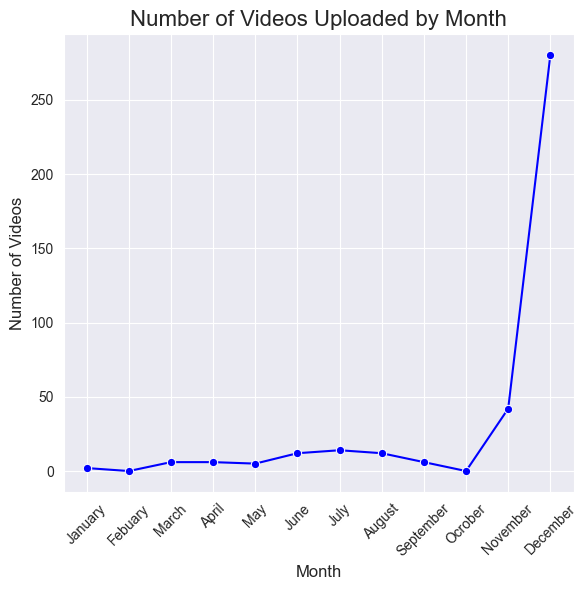

In [180]:
# Count the number of videos uploaded on each month
video_month = new['month'].value_counts().sort_index()
# Plotting the data
fig, ax = plt.subplots(figsize=(6, 6))
sns.set_style("darkgrid")
sns.lineplot(x=video_month.index,
             y=video_month.values, marker='o',
             ax=ax, color='blue')
ax.set_title('Number of Videos Uploaded by Month', fontsize=16)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Number of Videos', fontsize=12)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

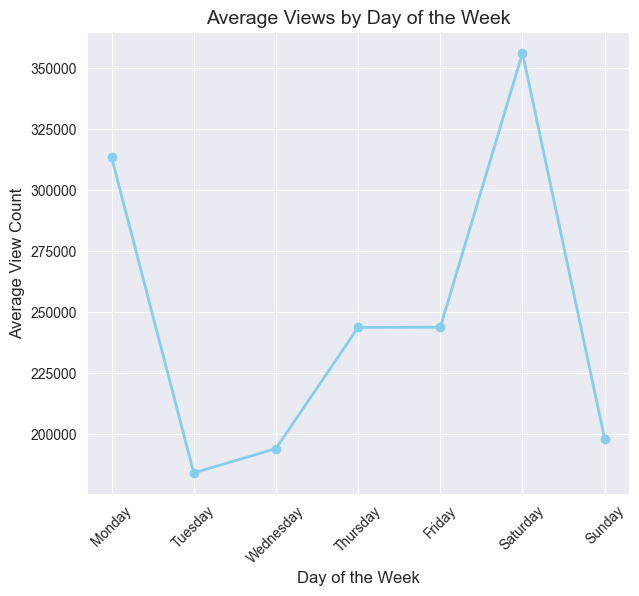

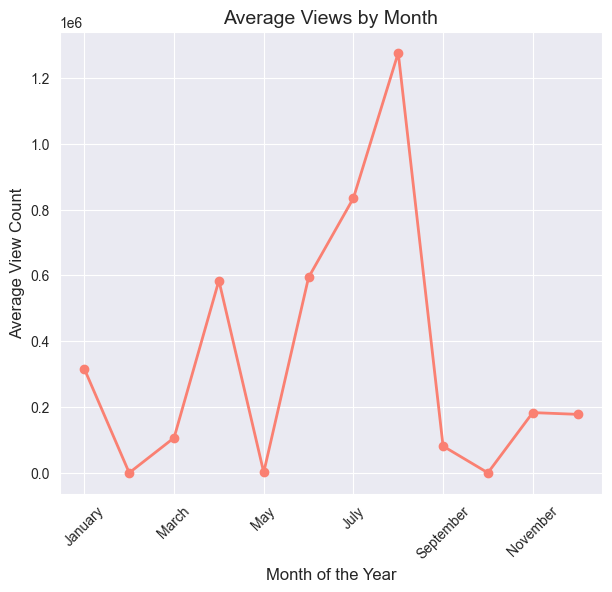

In [198]:
day_order = ['Monday', 'Tuesday', 'Wednesday',
             'Thursday', 'Friday', 'Saturday', 'Sunday']
month_order = ['January', 'February', 'March',
               'April', 'May', 'June', 'July', 'August',
               'September', 'October', 'November', 'December']
# Group by day of the week and calculate the average view count
day_of_week_views = new.groupby('day')['view_count'].mean().reindex(day_order)
# Group by month and calculate the average view count
month_views = new.groupby('month')['view_count'].mean().reindex(month_order)
month_views = month_views.fillna(0)

# Plotting for days of the week (Line plot)
plt.figure(figsize=(7, 6))
day_of_week_views.plot(kind='line', marker='o', color='skyblue', linewidth=2)
plt.title('Average Views by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average View Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
# Plotting for months (Line plot)
plt.figure(figsize=(7, 6))
month_views.plot(kind='line', marker='o', color='salmon', linewidth=2)
plt.title('Average Views by Month', fontsize=14)
plt.xlabel('Month of the Year', fontsize=12)
plt.ylabel('Average View Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# **Findings and Recommendations**

### 1. **Relationship between Likes, Comments, and Views**:
- There is a **strong positive correlation** between **view_count** and **like_count** (0.90), and between **view_count** and **comment_count** (0.82).
- This indicates that videos with more likes and comments tend to receive more views, highlighting the importance of **audience engagement**.

### 2. **Effect of Video Duration on Views and Engagement**:
- **Video duration** shows **weak correlations** with views, likes, and comments:  
    - Duration vs Views: 0.041  
    - Duration vs Likes: -0.035  
    - Duration vs Comments: -0.021  
- This suggests that **video length** has minimal impact on engagement or views, meaning creators can focus on **delivering high-quality, concise content** without worrying too much about length.

### 3. **Optimal Time for Uploads and Views**:
- **Most uploads** occur on **Tuesday** and **Sunday**, while **most views** happen on **Monday** and **Saturday**.
- **Most uploads** are seen in **November** and **December**, while the **highest views** are observed in **July** and **August**.
- **Recommendation**: Uploading on **Sundays and Tuesdays** aligns with peak upload activity, while **high views are more likely** on **Mondays and Saturdays** (especially in the summer months of **July** and **August**).

### 4. **Popular Keywords in Video Descriptions**:
- The **word cloud** analysis of video descriptions helps identify frequently used terms and themes. This can guide creators to incorporate relevant keywords that may increase discoverability and engagement.

---

### **Recommendations**:

1. **Boost Engagement by Promoting Interactions**:
    - Given the strong correlation between likes, comments, and views, content creators should actively encourage **audience engagement** (likes, comments, shares) to increase visibility and drive more views.

2. **Video Duration**:
    - Since video duration has little effect on engagement or views, creators should focus on delivering **concise, high-quality content**. Length should be dictated by the content rather than aiming for a specific time.

3. **Optimal Posting Times**:
    - **Upload on Sundays and Tuesdays** to ensure maximum visibility.  
    - Aim to post in the **summer months** (July and August), when engagement is higher.

4. **Leverage Popular Keywords**:
    - Use **trending keywords** identified from video descriptions to **optimize discoverability** and engagement.

By adopting these strategies, creators can better align with audience preferences, leading to more successful content and increased overall channel performance.


